In [1]:
### Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib  # to save the trained model in disk

C:\Users\acer\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
# Read dataset
data = pd.read_csv("mnist_784.csv")  # the dataset must to be in your directory
n_samples = 70000                    # 70000 is the maximum amount of elements

# Model entries
x = np.asanyarray(data.drop(columns=['class']))[:n_samples,:]
y = np.asanyarray(data[['class']])[:n_samples].ravel()


In [3]:
# Split dataset for training and testing
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1)


In [4]:
# Create our model
model = Pipeline([
    ('scaler', StandardScaler()),   # standard scaler
    ('pca', PCA(n_components=50)),  # to reduce images dimensionality
    ('svm', svm.SVC(gamma=0.0001))  # our classification model
])

In [5]:
# Trainning

# This will take several time depending on your machine and the samples you entered
model.fit(xtrain, ytrain)

# Score
print("Train: ", model.score(xtrain, ytrain))
print("Test: ", model.score(xtest, ytest))

Train:  0.9223492063492064
Test:  0.9235714285714286


In [6]:
####### Save the trained model in disk
joblib.dump(model, 'Model.pkl')

['Model.pkl']

In [7]:
# Predict
ypred = model.predict(xtest)

# Metrics
print("CLASSIFICATION REPORT: \n", metrics.classification_report(ytest, ypred))
print("\nCONFUSION MATRIX: \n", metrics.confusion_matrix(ytest, ypred))

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       704
           1       0.94      0.98      0.96       806
           2       0.92      0.92      0.92       700
           3       0.91      0.90      0.91       743
           4       0.92      0.94      0.93       705
           5       0.90      0.88      0.89       652
           6       0.95      0.96      0.95       665
           7       0.93      0.94      0.93       677
           8       0.90      0.88      0.89       676
           9       0.90      0.88      0.89       672

    accuracy                           0.92      7000
   macro avg       0.92      0.92      0.92      7000
weighted avg       0.92      0.92      0.92      7000


CONFUSION MATRIX: 
 [[668   0   4   0   2   9   8   2  10   1]
 [  0 793   2   4   1   3   2   0   1   0]
 [  3   7 641   7   7   3   7   9  15   1]
 [  3   6  18 672   1  15   1   6  18   3]
 [  1   3   8   0 662  

Text(0.5, 1.0, 'Model Prediction: 0')

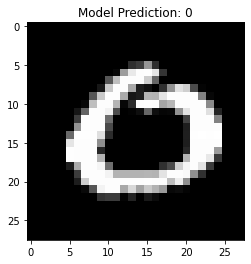

In [39]:
# Make predictions
sample = np.random.randint(xtest.shape[0])
plt.imshow(xtest[sample].reshape((28,28)), cmap=plt.cm.gray)
plt.title("Model Prediction: %i" % ypred[sample])
